<a href="https://colab.research.google.com/github/amornvitz/HCIA-AI/blob/main/Stock_price_prediction_60days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get the stock quote for APPLE INC. using the stock ticker AAPL form Jan 2012 to Oct 25 2020
df = web.DataReader('PTT.BK', data_source='yahoo', start='2001-12-01', end='2020-10-27')
# display the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-12-06,3.825,3.55,3.800,3.575,1.736808e+09,0.001111
2001-12-07,3.625,3.55,3.625,3.550,4.125330e+08,0.001103
2001-12-11,3.550,3.40,3.550,3.400,4.091580e+08,0.001056
2001-12-12,3.525,3.40,3.425,3.500,3.072910e+08,0.001087
2001-12-13,3.525,3.50,3.500,3.500,3.729610e+08,0.001087
...,...,...,...,...,...,...
2020-10-21,32.500,31.75,32.250,32.250,4.970580e+07,32.250000
2020-10-22,32.750,31.50,32.000,32.250,3.806870e+07,32.250000
2020-10-26,32.250,31.50,32.000,32.250,3.268130e+07,32.250000


In [ ]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4661.000000,4661.000000,4661.000000,4661.000000,4.661000e+03,4661.000000
mean,30.373879,29.767609,30.081522,30.064428,5.626354e+07,10.876801
std,21.595426,21.524760,21.566994,21.562156,4.886781e+07,15.745070
min,3.025000,2.875000,2.925000,2.900000,0.000000e+00,0.001056
25%,22.000000,21.600000,21.799999,21.799999,3.038600e+07,0.234814
50%,30.900000,30.200001,30.500000,30.600000,4.611200e+07,2.368767
75%,35.599998,35.000000,35.299999,35.299999,6.937600e+07,12.923616
max,368.000000,368.000000,368.000000,368.000000,1.736808e+09,53.604412


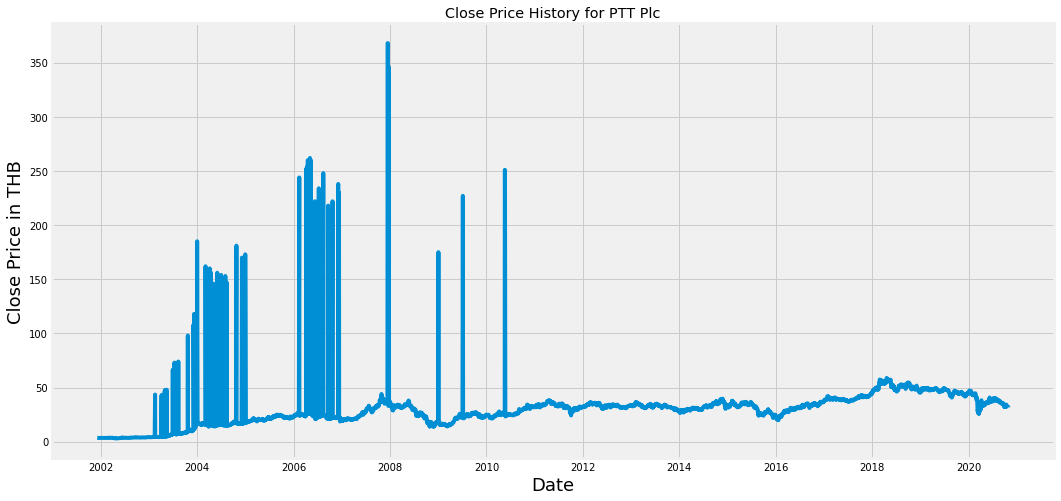

In [ ]:
# visualize the record in the dataset in the form of a graph (for closing price history for PTT PLC.)
plt.figure(figsize=(16,8))
plt.title('Close Price History for PTT Plc')
plt.plot(df.Close)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price in THB', fontsize = 18)
plt.show()

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.3)
    q3 = df_in[col_name].quantile(0.7)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-3*iqr
    fence_high = q3+3*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
from scipy import stats
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 1).all(axis=1)
new_df = df[filtered_entries]
new_df.shape
#print(z_scores)
#print(new_df)
#new_df = remove_outlier(df, 'Low')
#new_df.describe()

(2889, 6)

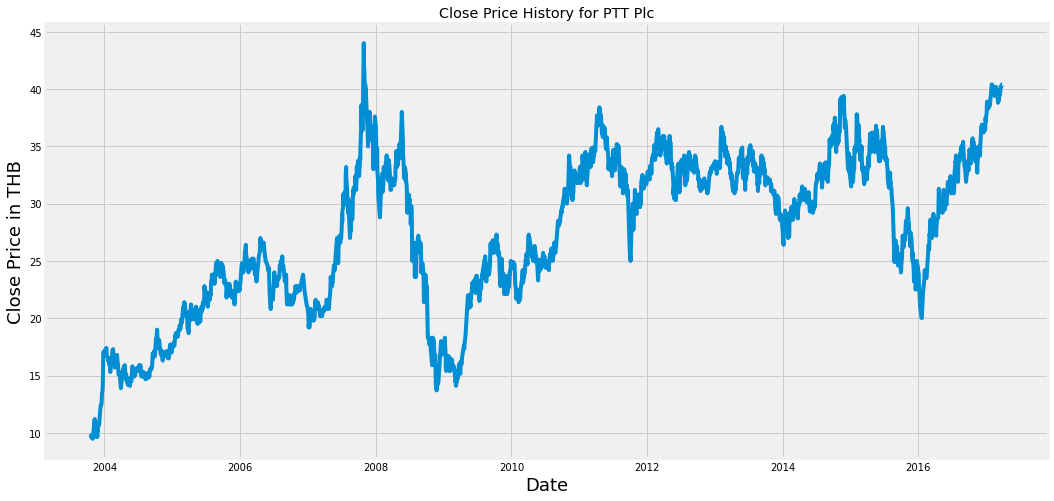

In [ ]:
# visualize the record in the dataset in the form of a graph (for closing price history for PTT PLC.)
plt.figure(figsize=(16,8))
plt.title('Close Price History for PTT Plc')
plt.plot(new_df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price in THB', fontsize = 18)
plt.show()

In [ ]:
# create a new dataframe for the close price.
data = new_df.filter(['Close'])

# converting the dataframe to numpy array
dataset = data.values

# decide the training and testing dataset -> 80%
training_data_len = math.ceil(len(dataset)*.80)

In [ ]:
# Data Normalizing
# Scale all the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
# Create the scale training dataset
train_data = scaled_data[0:training_data_len,:]

# Split the data into input and output dataset (x_train, y_train)
x_train = []
y_train = []

# 60 is coming form 60 days.
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60: i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data into 3-dimensional form (no of samples, no of time steps, no of features) the shape accepted by LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Build LSTM model
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#Compile the LSTM model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#Train the LSMT Model
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
2252/2252 [==============================] - 49s 22ms/step - loss: 0.0018
Epoch 2/10
2252/2252 [==============================] - 49s 22ms/step - loss: 8.0842e-04
Epoch 3/10
2252/2252 [==============================] - 49s 22ms/step - loss: 5.7854e-04
Epoch 4/10
2252/2252 [==============================] - 48s 21ms/step - loss: 5.0717e-04
Epoch 5/10
2252/2252 [==============================] - 48s 21ms/step - loss: 4.6337e-04
Epoch 6/10
2252/2252 [==============================] - 48s 21ms/step - loss: 4.5264e-04
Epoch 7/10
2252/2252 [==============================] - 49s 22ms/step - loss: 4.5451e-04
Epoch 8/10
2252/2252 [==============================] - 48s 21ms/step - loss: 4.1166e-04
Epoch 9/10
2252/2252 [==============================] - 59s 26ms/step - loss: 4.1939e-04
Epoch 10/10
2252/2252 [==============================] - 53s 23ms/step - loss: 3.9744e-04


In [ ]:
# create test dataset
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

# Convert the x_test set to a numpy array
x_test = np.array(x_test)

# Reshape the data into 3-dimensional form (no of samples, no of time steps, no of features) the shape accepted by LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Getting the models to predict price values
prediction = model.predict(x_test)

# undo normalization
prediction = scaler.inverse_transform(prediction)

# Measure the model assessment for accuracy
# Value of 0 means the model predicting value matching the actual value from the test dataset perfectly; the lower the value the better the model performed.
# there are mnay metrics to value the performance of the model. Root Mean Square Error (RMSE) is used here.
# Calculate the value of RMSE as follows:
rmse = np.sqrt(np.mean(prediction-y_test)**2)
print("RMSE Value: ", rmse)


RMSE Value:  0.1503891837452272


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


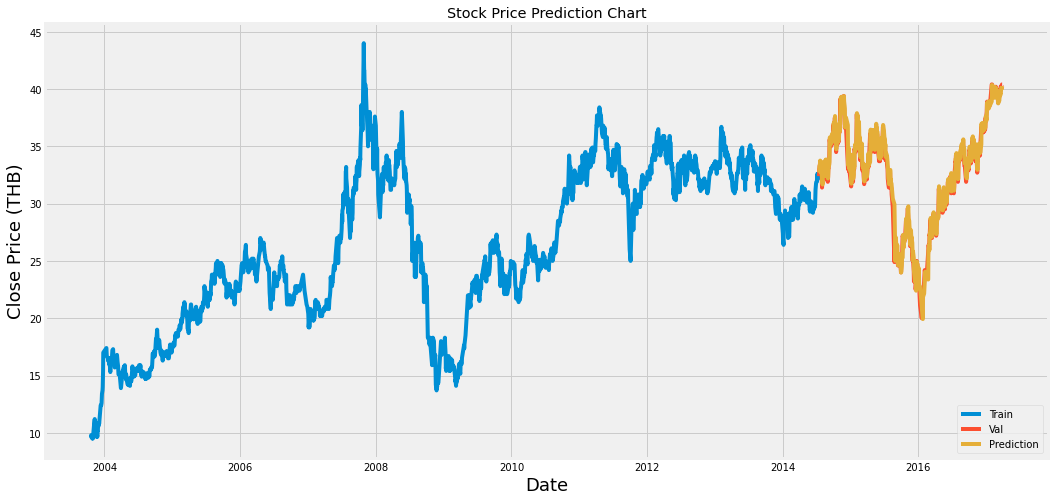

In [ ]:
# Data Testing
# Create and plot the data for a graph
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Prediction']=prediction

# Visualise the data
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction Chart')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (THB)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Val','Prediction'],loc='lower right')
plt.show()

In [ ]:
# Display the actual (valid) and predicted prices
valid

,Close,Prediction
Date,,
2014-07-16,32.400002,32.635696
2014-07-17,33.000000,32.649330
2014-07-18,33.099998,33.286289
2014-07-21,33.500000,33.353138
2014-07-22,33.099998,33.753300
...,...,...
2017-03-17,39.599998,39.612850
2017-03-20,40.200001,39.505165
2017-03-23,40.200001,40.097950


In [ ]:
# Get the quote 
ptt_quote = web.DataReader('PTT.BK',data_source='yahoo',start='2001-12-01',end='2020-10-23')

# Create a new dataframe
new_df_1 = ptt_quote.filter(['Close'])

# Get the last 360 days of closing price
last_60_days = new_df_1[-60:].values

# Scale the data to be values between 0 to 1
last_60_days_scaled = scaler.transform(last_360_days)

# Create an empty list
x_test1=[]

# Append the past 60 days
x_test1.append(last_60_days_scaled)

# Convert the x_test1 dataset to a numpy array
x_test1 = np.array(x_test1)

# Reshape the data
x_test1 = np.reshape(x_test1,(x_test1.shape[0],x_test1.shape[1],1))

# Get the predicted scaled price
pred_price=model.predict(x_test1)

# Undo the scaling /normalisation
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[32.536503]]


In [ ]:
# Extract the actual price of APPLE on a particular day
ptt_quote_now = web.DataReader('PTT.BK',data_source='yahoo',start='2020-10-28',end='2020-10-28')
print("PTT Plc price for the date (THB):", ptt_quote_now['Close'])
print("PTT Plc predicted price based on 60 days value: %f" % pred_price)
print(ptt_quote_now/pred_price)

PTT Plc price for the date (THB): Date
2020-10-28    31.5
Name: Close, dtype: float64
PTT Plc predicted price based on 60 days value: 32.536503
                High       Low      Open     Close        Volume  Adj Close
Date                                                                       
2020-10-28  0.991194  0.968143  0.975827  0.968143  1.586092e+06   0.968143
